## LIBRARY

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [43]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [44]:
fraudtrain = pd.read_csv('/content/drive/MyDrive/DWIMAS ARIE/INDONESIA AI/FRAUD DETECTION/fraudTrain.csv')

In [45]:
fraudtest = pd.read_csv('/content/drive/MyDrive/DWIMAS ARIE/INDONESIA AI/FRAUD DETECTION/fraudTest.csv')

In [46]:
fraudtrain

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


## **EDA (EKSPLORATORY DATA ANALYSIS)**

In [47]:
fraudtrain.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
# Cek Null value
fraudtrain.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [48]:
fraudtrain.shape

(1296675, 23)

In [49]:
fraudtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## DESKRIPSI FITUR

1. trans_date_trans_time: Tanggal dan waktu transaksi.
2. cc_num: Nomor kartu kredit (disamarkan).
3. merchant: Merchant atau pedagang tempat transaksi dilakukan, dengan indikasi "fraud" untuk penipuan.
4. category: Kategori merchant, seperti grocery_pos (grosir), shopping_net (belanja online), dll.
5. amt: Jumlah uang yang ditransaksikan.
6. first: Nama depan pemegang kartu kredit.
7. last: Nama belakang pemegang kartu kredit.
8. gender: Jenis kelamin pemegang kartu kredit.
9. street: Alamat jalan pemegang kartu kredit.
10. city: Kota pemegang kartu kredit.
11. state: Negara bagian pemegang kartu kredit.
12. zip: Kode pos pemegang kartu kredit.
13. lat: Lintang lokasi pemegang kartu kredit.
14. long: Bujur lokasi pemegang kartu kredit.
15. city_pop: Populasi kota tempat tinggal pemegang kartu kredit.
16. job: Pekerjaan pemegang kartu kredit.
17. dob: Tanggal lahir pemegang kartu kredit (date of birth).
18. trans_num: Nomor transaksi.
19. unix_time: Waktu transaksi dalam format Unix timestamp.
20. merch_lat: Lintang lokasi merchant.
21. merch_long: Bujur lokasi merchant.
22. is_fraud: Indikator apakah transaksi adalah penipuan (1 untuk penipuan, 0 untuk bukan penipuan).

### Deskripsi Fitur dan Pengelompokan Fitur



In [50]:
# mengelompokan fitur dengan column

Datetime = ['trans_date_trans_time', 'dob']
Loc      = ['lat', 'long', 'merch_lat', 'merch_long']
Num      = ['amt', 'zip', 'city_pop', 'unix_time']
Cat      = ['merchant', 'category', 'gender', 'city', 'state', 'job']

In [51]:
# Mengecek jumlah karakter unik pada fitur job
fraudtrain.job.nunique()

494

In [52]:
# cek jumlah fraud pada fitur
fraudtrain.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [53]:
fraudtrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Feature Engineering

In [54]:
# Membuat fitur baru
# Konversi waktu tanggal ke format datetime
fraudtrain['trans_date_trans_time'] = pd.to_datetime(fraudtrain['trans_date_trans_time'])
fraudtest['trans_date_trans_time'] = pd.to_datetime(fraudtest['trans_date_trans_time'])
fraudtrain['dob'] = pd.to_datetime(fraudtrain['dob'])
fraudtest['dob'] = pd.to_datetime(fraudtest['dob'])

# Feature engineering umur
fraudtrain['age'] = fraudtrain['trans_date_trans_time'].dt.year - fraudtrain['dob'].dt.year
fraudtest['age'] = fraudtest['trans_date_trans_time'].dt.year - fraudtest['dob'].dt.year

# Feature engineering kategori jam
fraudtrain['trans_hour'] = fraudtrain['trans_date_trans_time'].dt.hour
fraudtest['trans_hour'] = fraudtest['trans_date_trans_time'].dt.hour

# Feature engineering kategori hari
fraudtrain['trans_day'] = fraudtrain['trans_date_trans_time'].dt.dayofweek
fraudtest['trans_day'] = fraudtest['trans_date_trans_time'].dt.dayofweek

<Axes: title={'center': 'Fraud Transaction in Hour'}, xlabel='trans_hour_', ylabel='percentage'>

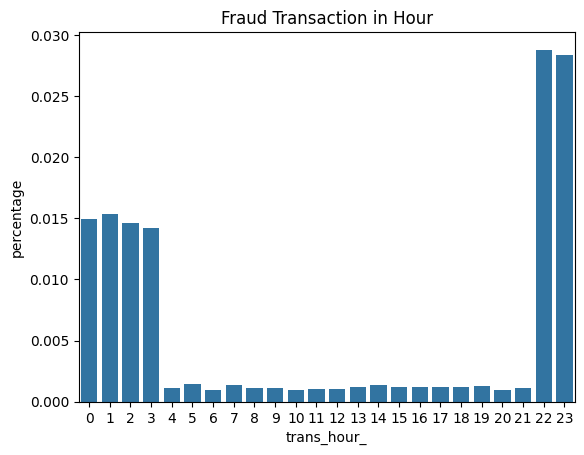

In [55]:
hour_trx_fraud = fraudtrain.groupby(
    ['trans_hour'], as_index=False
).agg({
    "is_fraud": ["count", "sum"]
})

hour_trx_fraud.columns = ['_'.join(x) for x in hour_trx_fraud.columns]
hour_trx_fraud["percentage"] = hour_trx_fraud.is_fraud_sum/hour_trx_fraud.is_fraud_count

plt.title ("Fraud Transaction in Hour")
sns.barplot(data=hour_trx_fraud, y="percentage", x="trans_hour_", orient="v")

In [56]:
# Definisikan rentang waktu safe_time dan risk_time berdasarkan analisis sebelumnya
safe_time_hours = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
risk_time_hours = [0, 1, 2, 3, 21, 22, 23]

# Buat fitur category_time berdasarkan trans_hour
fraudtrain['category_time'] = fraudtrain['trans_hour'].apply(lambda x: 'risk_time' if x in risk_time_hours else 'safe_time')
fraudtest['category_time'] = fraudtest['trans_hour'].apply(lambda x: 'risk_time' if x in risk_time_hours else 'safe_time')

In [57]:
print(fraudtrain[['trans_hour', 'category_time']].head())

   trans_hour category_time
0           0     risk_time
1           0     risk_time
2           0     risk_time
3           0     risk_time
4           0     risk_time


In [58]:
print(fraudtest[['trans_hour', 'category_time']].head())

   trans_hour category_time
0          12     safe_time
1          12     safe_time
2          12     safe_time
3          12     safe_time
4          12     safe_time


<Axes: title={'center': 'Fraud Transaction in day'}, xlabel='trans_day_', ylabel='percentage'>

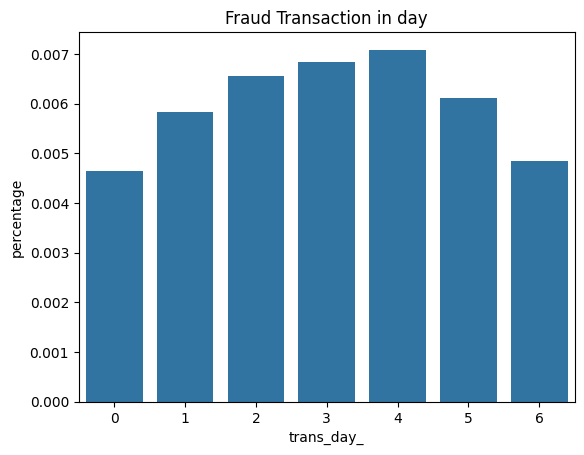

In [59]:
day_fraud = fraudtrain.groupby(
    ['trans_day'], as_index=False
).agg({
    "is_fraud": ["count", "sum"]
})

day_fraud.columns = ['_'.join(x) for x in day_fraud.columns]
day_fraud["percentage"] = day_fraud.is_fraud_sum/day_fraud.is_fraud_count

plt.title ("Fraud Transaction in day")
sns.barplot(data=day_fraud, y="percentage", x="trans_day_", orient="v")

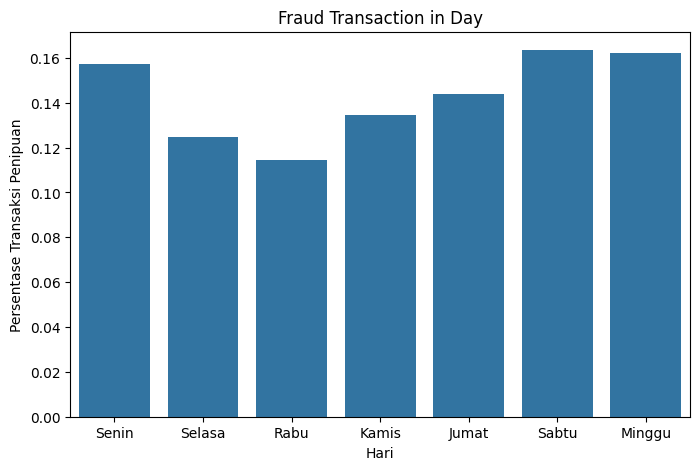

In [60]:
fraud_transactions = fraudtrain[fraudtrain['is_fraud'] == 1]

# Melihat data penipuan pada rentang hari
day_fraud = fraud_transactions.groupby(['trans_day'], as_index=False).agg({
    "is_fraud": "sum"
})

# Menghitung persentase penipuan dari total transaksi penipuan
total_fraud = day_fraud['is_fraud'].sum()
day_fraud["percentage"] = day_fraud['is_fraud'] / total_fraud

# Daftar hari dalam seminggu
day_labels = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Menyusun plot
plt.figure(figsize=(8, 5))
sns.barplot(data=day_fraud, y="percentage", x="trans_day", orient="v")

# Melabeli sumbu X untuk diurutkan sesuai nama hari
plt.xticks(ticks=range(len(day_fraud)), labels=[day_labels[i] for i in day_fraud['trans_day']])
plt.title("Fraud Transaction in Day")
plt.xlabel('Hari')
plt.ylabel('Persentase Transaksi Penipuan')

plt.show()

<ipython-input-61-00a28c31863e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


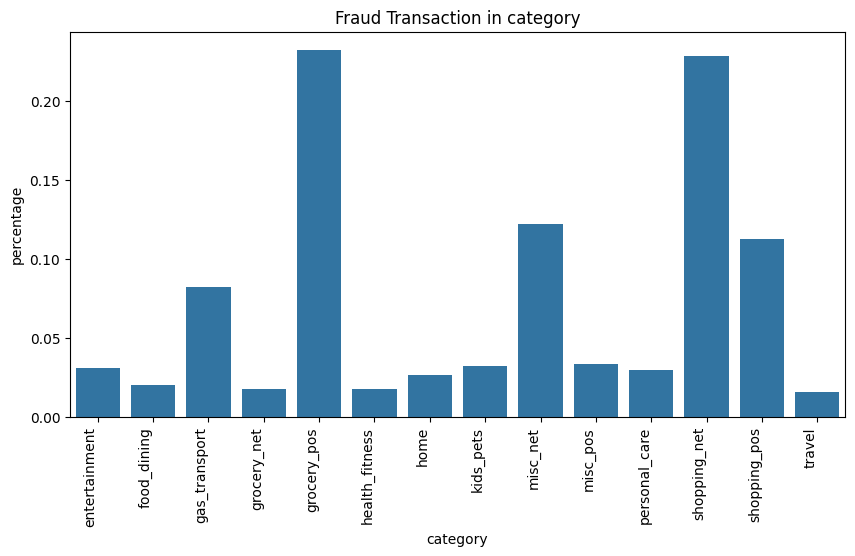

In [61]:
# Memfilter data khusus transaksi penipuan
fraud_transactions = fraudtrain[fraudtrain['is_fraud'] == 1]


# Menghitung jumlah transaksi penipuan per kategori dan persentase
category_fraud = fraud_transactions.groupby('category')['is_fraud'].sum().reset_index()
category_fraud['percentage'] = category_fraud['is_fraud'] / category_fraud['is_fraud'].sum()

plt.figure (figsize=(10,5))
plt.title ("Fraud Transaction in category")
ax=sns.barplot(data=category_fraud, y="percentage", x="category", orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

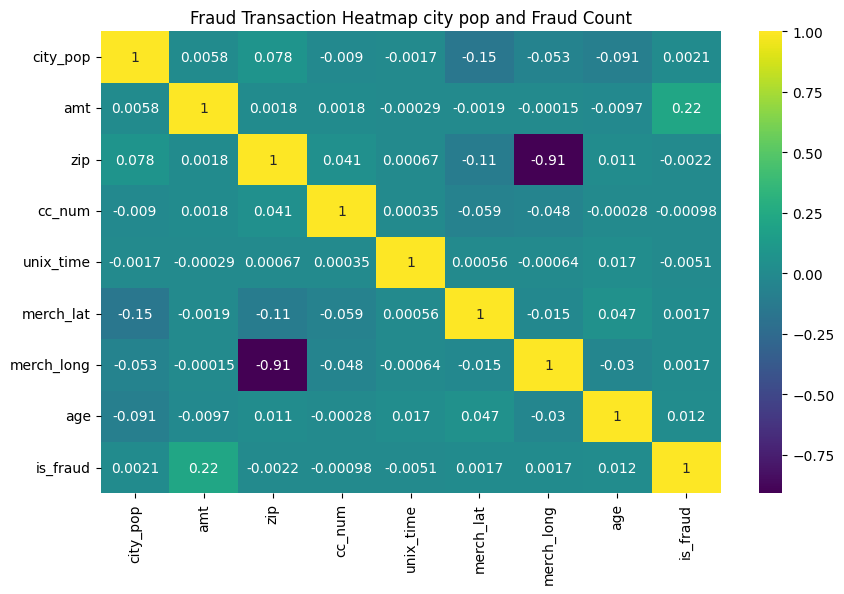

In [62]:
# Cek heatmap untuk melihat multikolinieritas

plt.figure(figsize=(10, 6))
plt.title("Fraud Transaction Heatmap city pop and Fraud Count")
sns.heatmap(fraudtrain[['city_pop', 'amt', 'zip','cc_num', 'unix_time', 'merch_lat', 'merch_long', 'age', 'is_fraud']].corr(), annot=True, cmap="viridis")
plt.show()

# Preprocessing dan Split Data

In [63]:
# Split data

num_cols = ['amt', 'age']
cat_cols = ['category', 'trans_hour', 'category_time']

num_train = fraudtrain[num_cols].copy()
cat_train = fraudtrain[cat_cols].copy()
num_test = fraudtest[num_cols].copy()
cat_test = fraudtest[cat_cols].copy()

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Menerapkan one hot encoding pada column kategorikal

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_train = encoder.fit_transform(cat_train)
cat_test = encoder.transform(cat_test)

In [65]:
# Concatenate data column numerikal dan kategorikal

X_train = np.hstack((num_train, cat_train))
X_test = np.hstack((num_test, cat_test))

In [66]:
# Split label

y_train = fraudtrain['is_fraud'].values.copy()
y_test = fraudtest['is_fraud'].values.copy()

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Menerapkan Oversample menggunakan SMOTE
# Membuat oversample kelas minoritas hingga 100.000 sample
# Membuat undersample kelas mayoritas hingga 10.000 sample

smote = SMOTE(sampling_strategy={1: 100000}, random_state=24)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [68]:
# Melihat encoded feature

encoded_feature_names = encoder.get_feature_names_out(cat_cols)
feature_names = np.append(num_cols, encoded_feature_names)

In [69]:
# Membuat display hasil encoded

feature_df = pd.DataFrame(X_train, columns=feature_names)
process_df = pd.concat([feature_df, pd.Series(y_train, name='is_fraud')], axis=1)
process_df

,amt,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,trans_hour_17,trans_hour_18,trans_hour_19,trans_hour_20,trans_hour_21,trans_hour_22,trans_hour_23,category_time_risk_time,category_time_safe_time,is_fraud
0,4.970000,31.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0
1,107.230000,41.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0
2,220.110000,57.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0
3,45.000000,52.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0
4,41.960000,33.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389164,371.516798,53.754255,0.245745,0.0,0.0,0.0,0.754255,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,1
1389165,472.340131,36.825775,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.956444,1.0,0.0,1
1389166,260.262442,47.494893,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.494893,0.505107,1.0,0.0,1
1389167,932.726997,63.740364,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1


# EVALUASI

## Random Forest

In [70]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Memuat model random forest

model = RandomForestClassifier(n_jobs=-1)

# Set parameter grid

param_grid = {
    'n_estimators': [100],
    'max_depth'   : [20],
}

# Menentukan metriks

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [20], 'n_estimators': [100]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [71]:
# Melihat hasil Grid Search

results = grid_search.cv_results_


print(f"Best parameters     : {grid_search.best_params_}")
print(f"Best accuracy score : {grid_search.best_score_}")

for metric in scoring.keys():
    print(f"\nResults for {metric}:")
    for mean_score, std_score, params in zip(results[f'mean_test_{metric}'], results[f'std_test_{metric}'], results['params']):
        print(f"Mean: {mean_score:.3f} (Std: {std_score:.3f}) with: {params}")

Best parameters     : {'max_depth': 20, 'n_estimators': 100}
Best accuracy score : 0.9959947287673392

Results for accuracy:
Mean: 0.996 (Std: 0.002) with: {'max_depth': 20, 'n_estimators': 100}

Results for precision:
Mean: 0.993 (Std: 0.001) with: {'max_depth': 20, 'n_estimators': 100}

Results for recall:
Mean: 0.951 (Std: 0.035) with: {'max_depth': 20, 'n_estimators': 100}

Results for f1:
Mean: 0.971 (Std: 0.018) with: {'max_depth': 20, 'n_estimators': 100}


# LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Memuat model

model_lr = LogisticRegression(n_jobs=-1, solver='saga', penalty='elasticnet')

# Set Parameter

param_lr = {
    'C'        : [1],
    'l1_ratio' : [0.5],
}

# Menentukan metriks

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Melakukan grid search dengan cross validation

grid_search = GridSearchCV(estimator=model_lr, param_grid=param_lr, scoring=scoring, refit='accuracy', cv=5, return_train_score=True, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time= 3.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................................C=1, l1_ratio=0.5; total time= 2.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(n_jobs=-1, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': [1], 'l1_ratio': [0.5]}, refit='accuracy',
             return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [73]:
# Melihat hasil Grid Search dengan cross validation


results = grid_search.cv_results_

print(f"Parameter terbaik : {grid_search.best_params_}")
print(f"Akurasi terbaik   : {grid_search.best_score_}")

df_results = pd.DataFrame(results)
df_results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'mean_fit_time', 'mean_score_time']]

Parameter terbaik : {'C': 1, 'l1_ratio': 0.5}
Akurasi terbaik   : 0.9497822082563628


,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_fit_time,mean_score_time
0,"{'C': 1, 'l1_ratio': 0.5}",0.949782,0.769572,0.43165,0.553073,163.942397,0.39183


# Melatih model

## Menggunakan Smote Random Forest


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1)

In [75]:
# Cek hasil model dengan SMOTE

y_predict = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
recall = recall_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

accuracy  : 99.70%
precision : 99.59%
recall    : 96.19%
f1        : 97.86%


## Tanpa smote

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1)

In [78]:
# Cek hasil model tanpa SMOTE


y_predict = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
recall = recall_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

accuracy  : 99.70%
precision : 99.60%
recall    : 96.18%
f1        : 97.86%


In [79]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_train, y_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00   1289169
     class 1       1.00      0.96      0.98    100000

    accuracy                           1.00   1389169
   macro avg       1.00      0.98      0.99   1389169
weighted avg       1.00      1.00      1.00   1389169



## Model Logistic Regression menggunakan Smote

In [80]:
from sklearn.linear_model import LogisticRegression
best_model2 = LogisticRegression(C=1, penalty='l2', solver='liblinear', n_jobs=-1)
best_model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


LogisticRegression(C=1, n_jobs=-1, solver='liblinear')

In [81]:
# Cek hasil model dengan SMOTE

y_predict = best_model2.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
recall = recall_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

accuracy  : 96.71%
precision : 91.77%
recall    : 59.64%
f1        : 72.30%


## Tanpa Smote

In [82]:
best_model2 = LogisticRegression(C= 1, l1_ratio= 0.5, n_jobs=-1)
best_model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.5, n_jobs=-1)

In [83]:
# Cek hasil model tanpa SMOTE

y_predict = best_model2.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
recall = recall_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

accuracy  : 96.81%
precision : 92.00%
recall    : 60.95%
f1        : 73.32%


## Model Gradient Bossting Mechine (GBM) menggunakan SMOTE


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=20, learning_rate=0.1)
gbm_model.fit(X_train, y_train)

In [ ]:
# Cek hasil model dengan SMOTE

y_predict = gbm_model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
recall = recall_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

## Tanpa SMOTE

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=20, learning_rate=0.1)
gbm_model.fit(X_train, y_train)

In [ ]:
# Cek hasil model tanpa SMOTE

y_predict = gbm_model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
precision = precision_score(y_train, y_predict)
recall = recall_score(y_train, y_predict)
f1 = f1_score(y_train, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

# Evaluasi menggunakan dataset Fraudtest

# Model Random Forest

## Menggunakan Smote

In [ ]:
# Cek hasil model dengan SMOTE

y_predict = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()

## Model Random Forest tanpa Smote

In [ ]:
# Cek hasil model tanpa SMOTE

y_predict = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predict, target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()

# Model Logistic Regression

## Menggunakan Smote

In [ ]:
# Cek hasil model dengan SMOTE

y_predict = best_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

## Model GBM

In [ ]:
# Cek hasil model dengan SMOTE

y_predict = gbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

## Tanpa SMOTE

In [ ]:
# Cek hasil model tanpa SMOTE

y_predict = gbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'accuracy  : {accuracy:.2%}')
print(f'precision : {precision:.2%}')
print(f'recall    : {recall:.2%}')
print(f'f1        : {f1:.2%}')

accuracy  : 99.79%
precision : 71.40%
recall    : 75.99%
f1        : 73.62%


In [ ]:
# Melihat Feature importance terhadap fitur target

importance_scores = best_model.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=feature_names)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()